# Split data
divide the data into sleep part and awake part

In [2]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

print ("Import finished!")

Import finished!


## define some functions

In [18]:
def sizeof_fmt(num, suffix='B'):
    '''output data sizes in a nice way, i.e. B, KiB, MiB, GiB, ...
    by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254,
    modified'''
    for unit in ['', 'Ki', 'Mi', 'Gi', 'Ti', 'Pi', 'Ei', 'Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

def readMiceData(batch, name):
    print('{}/batch{}/{}.Activity.txt'.format(path, batch, name))
    print('{}/batch{}/{}.Temperature.txt'.format(path, batch, name))
    a = np.genfromtxt('{}/batch{}/{}.Activity.txt'.format(path, batch, name))
    b = np.genfromtxt('{}/batch{}/{}.Temperature.txt'.format(path, batch, name))

    if a[0,0] != b[0,0]:
        start = max(a[0,0], b[0,0])
    else:
        start = a[0,0]
    if a[-1,0] != b[-1,0]:
        end = min(a[-1,0], b[-1,0])
    else:
        end = a[-1,0]

    a = a[(a[:,0]<=end)]
    a = a[(a[:,0]>=start)]
    b = b[(b[:,0]<=end)]
    b = b[(b[:,0]>=start)]
    
    return a, b

## Read the meta data

In [19]:
# Readin the meta data
path = '.'
metaData = pd.read_csv("./mice", index_col=0)

In [29]:
database = {}
for mouse in metaData.index: 
    print (mouse)
    batch = metaData.loc[mouse, 'batch']
    act, temp = readMiceData(batch, mouse)
    database[mouse] = [act, temp]

12Otx2
./batch3/12Otx2.Activity.txt
./batch3/12Otx2.Temperature.txt
56Otx2
./batch3/56Otx2.Activity.txt
./batch3/56Otx2.Temperature.txt
73Otx2
./batch3/73Otx2.Activity.txt
./batch3/73Otx2.Temperature.txt
84Otx2
./batch3/84Otx2.Activity.txt
./batch3/84Otx2.Temperature.txt
82WT
./batch3/82WT.Activity.txt
./batch3/82WT.Temperature.txt
83WT
./batch3/83WT.Activity.txt
./batch3/83WT.Temperature.txt
51M
./batch5/51M.Activity.txt
./batch5/51M.Temperature.txt
52M
./batch5/52M.Activity.txt
./batch5/52M.Temperature.txt
54M
./batch5/54M.Activity.txt
./batch5/54M.Temperature.txt
56M
./batch5/56M.Activity.txt
./batch5/56M.Temperature.txt
58M
./batch5/58M.Activity.txt
./batch5/58M.Temperature.txt
53
./batch5/53.Activity.txt
./batch5/53.Temperature.txt
55
./batch5/55.Activity.txt
./batch5/55.Temperature.txt
57
./batch5/57.Activity.txt
./batch5/57.Temperature.txt
68M
./batch6/68M.Activity.txt
./batch6/68M.Temperature.txt
62M
./batch6/62M.Activity.txt
./batch6/62M.Temperature.txt
64M
./batch6/64M.Activi

In [25]:
metaData.loc['12Otx2', 'batch']

3

In [31]:
path = '.'
batch = 3
mouse = '12Otx2'
act, temp = readMiceData(batch, mouse)

./batch3/12Otx2.Activity.txt
./batch3/12Otx2.Temperature.txt


In [33]:
winSize = 6
winNum = len(temp) // 6
tmp = temp[:,1].reshape(winNum,winSize)

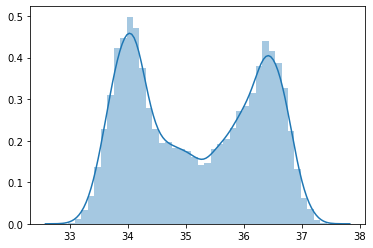

In [40]:
tempave = np.mean(tmp, axis=1)
sb.distplot(tempave)

In [47]:
density = np.histogram(tempave, bins=100 ,density=True)
print (density)

(array([2.46245737e-03, 2.46245737e-03, 4.92491475e-03, 9.84982950e-03,
       1.47747442e-02, 2.21621164e-02, 3.52952224e-02, 5.13011953e-02,
       5.29428336e-02, 8.49547794e-02, 1.17787544e-01, 1.43643347e-01,
       1.74424064e-01, 2.17106659e-01, 2.58968434e-01, 2.89749151e-01,
       3.16425773e-01, 3.50079357e-01, 4.37086184e-01, 4.42011099e-01,
       4.40369461e-01, 4.45704785e-01, 4.62121167e-01, 5.09728677e-01,
       5.07676629e-01, 4.80589598e-01, 4.66635673e-01, 4.39959051e-01,
       3.88657856e-01, 3.43102394e-01, 3.00830209e-01, 2.68818263e-01,
       2.43783280e-01, 2.44604099e-01, 2.04383962e-01, 2.04383962e-01,
       1.85915532e-01, 1.90430037e-01, 2.03563143e-01, 1.94123723e-01,
       1.79348979e-01, 1.95354952e-01, 1.76886521e-01, 1.72782426e-01,
       1.81401027e-01, 1.86325941e-01, 1.63753415e-01, 1.73603245e-01,
       1.64163825e-01, 1.54724405e-01, 1.52672357e-01, 1.34614336e-01,
       1.41591299e-01, 1.48978671e-01, 1.46926623e-01, 1.73192835e-01,
     

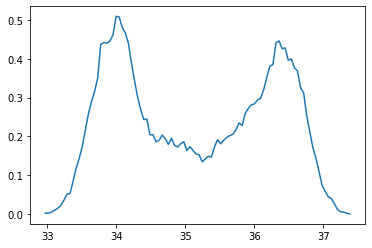

In [49]:
a = density[0]
b = density[1][0:-1]
plt.plot(b,a)

In [56]:
z = np.polyfit (b,a, 15)
fitfunc = np.poly1d(z)

/home/yiwen/.anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


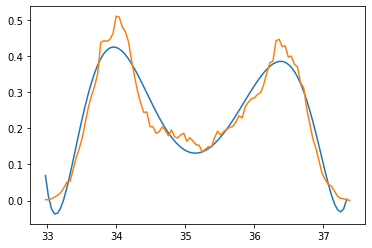

In [57]:
x = np.arange(b[0],b[-1],(b[-1]-b[0])/100)
y = fitfunc(x)
plt.plot(x,y)
plt.plot(b,a)
plt.show()